In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
import re
% matpllotlib inline

UsageError: Line magic function `%matpllotlib` not found.


In [2]:
read_df= pd.read_csv(r'C:\Users\egoeshu\Desktop\testingdoc\Youtube classifer ML\youtube_classifier_data_latest.csv')
read_df.head()

,link,title,Description,Category
0,U8X-fd_zQQ,12 Cool Science Tricks That Will Make Your Fri...,Impress your friends this weekend with these 1...,Science
1,VoLZXXQL-YY,9 Incredible Science Facts You Probably Didn't...,Common scientific facts you won't believe are ...,Science
2,DZcofvSqLHI,5 Amazing Experiments With Hand Sanitizer || E...,5 Simple Science Experiments With Hand Sanitiz...,Science
3,OY6RgrDKQ,18 EASY SCHOOL MAGIC TRICKS AND SCIENCE EXPERI...,UNEXPECTED TRICKS AND IDEAS FOR KIDS\n\nThere ...,Science
4,i_2PtL7cRyE,विज्ञान के सबसे घातक प्रयोग Terrible Science E...,mYTH Tv India\n#MTI7,Science


In [4]:
temp= read_df.copy()
temp.head()

,link,title,Description,Category
0,U8X-fd_zQQ,12 Cool Science Tricks That Will Make Your Fri...,Impress your friends this weekend with these 1...,Science
1,VoLZXXQL-YY,9 Incredible Science Facts You Probably Didn't...,Common scientific facts you won't believe are ...,Science
2,DZcofvSqLHI,5 Amazing Experiments With Hand Sanitizer || E...,5 Simple Science Experiments With Hand Sanitiz...,Science
3,OY6RgrDKQ,18 EASY SCHOOL MAGIC TRICKS AND SCIENCE EXPERI...,UNEXPECTED TRICKS AND IDEAS FOR KIDS\n\nThere ...,Science
4,i_2PtL7cRyE,विज्ञान के सबसे घातक प्रयोग Terrible Science E...,mYTH Tv India\n#MTI7,Science


In [5]:
temp.info() # so no null value found in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   link         223 non-null    object
 1   title        223 non-null    object
 2   Description  223 non-null    object
 3   Category     223 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


In [6]:
# checking null values
temp.isna().sum()

link           0
title          0
Description    0
Category       0
dtype: int64

In [7]:
temp.describe()

,link,title,Description,Category
count,223,223,223,223
unique,209,205,207,4
top,fE8lezHs19,Hindi Heart touching Song 2020 💖 Bollywood Hit...,Check out https://ExpressVPN.com/thefoodranger...,Songs
freq,2,4,2,62


In [8]:
#seeing null values
temp.isnull().sum()

link           0
title          0
Description    0
Category       0
dtype: int64

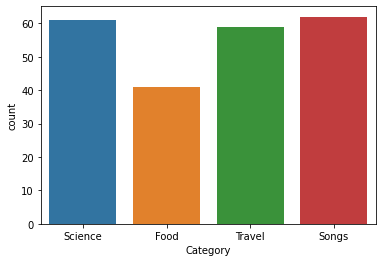

In [9]:
# checking the target variable i.e Category frequency
sns.countplot('Category', data=temp) # All are equal so no imbalanced dataset

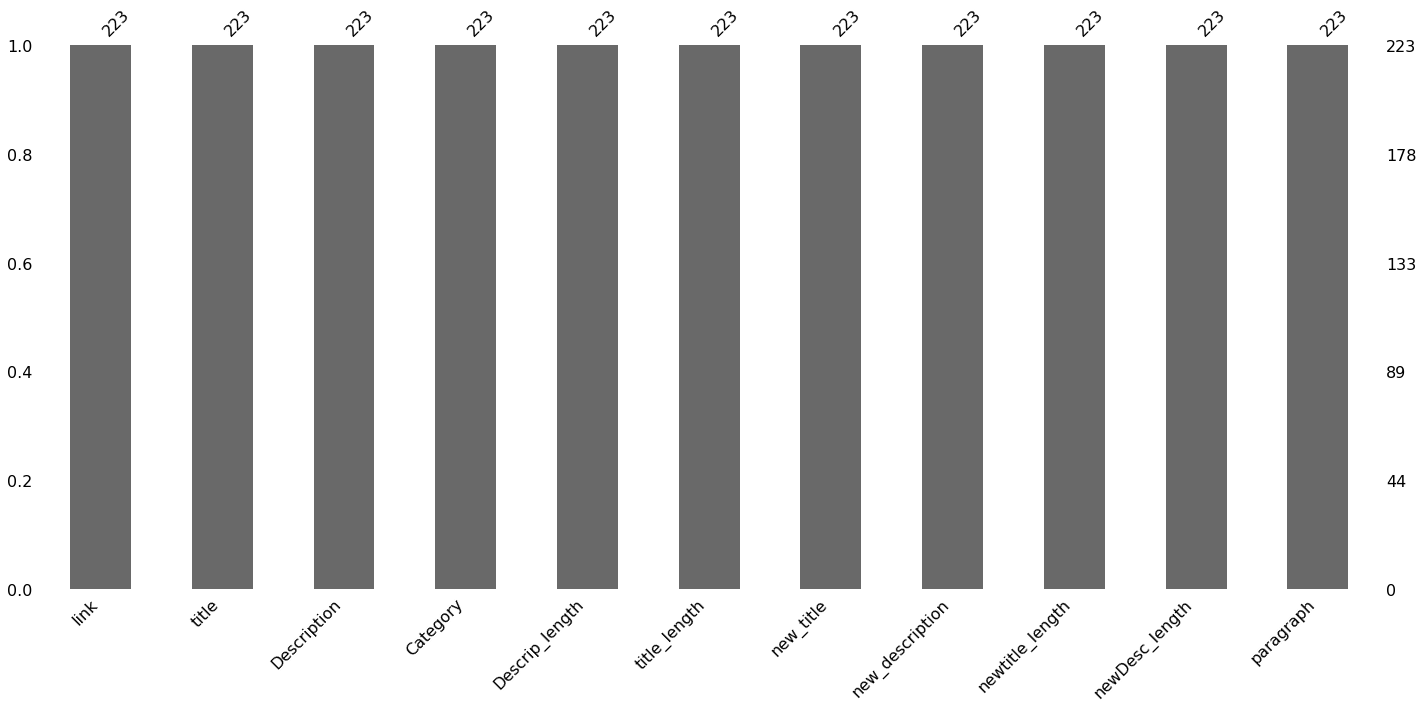

In [82]:
# To check null values in each column

import missingno as ms
ms.bar(temp)

#### EDA on Description Column

In [10]:
# Checking length of description of Description Column
temp['Descrip_length']= temp['Description'].apply(len)

In [11]:
temp.head()

,link,title,Description,Category,Descrip_length
0,U8X-fd_zQQ,12 Cool Science Tricks That Will Make Your Fri...,Impress your friends this weekend with these 1...,Science,241
1,VoLZXXQL-YY,9 Incredible Science Facts You Probably Didn't...,Common scientific facts you won't believe are ...,Science,274
2,DZcofvSqLHI,5 Amazing Experiments With Hand Sanitizer || E...,5 Simple Science Experiments With Hand Sanitiz...,Science,973
3,OY6RgrDKQ,18 EASY SCHOOL MAGIC TRICKS AND SCIENCE EXPERI...,UNEXPECTED TRICKS AND IDEAS FOR KIDS\n\nThere ...,Science,1496
4,i_2PtL7cRyE,विज्ञान के सबसे घातक प्रयोग Terrible Science E...,mYTH Tv India\n#MTI7,Science,19


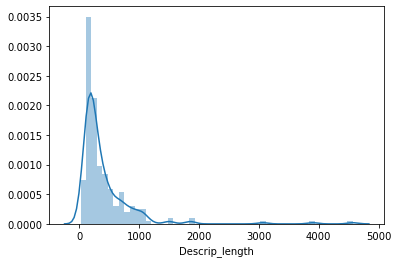

In [12]:
sns.distplot(temp['Descrip_length'], bins=50)# there are some outliers

In [13]:
# checking more info related to length
temp['Descrip_length'].describe()

count     223.000000
mean      415.125561
std       513.859677
min        19.000000
25%       158.500000
50%       252.000000
75%       493.000000
max      4570.000000
Name: Descrip_length, dtype: float64

In [14]:
# checking how many rows having length more than 2000
temp[temp['Descrip_length']>2000] 

,link,title,Description,Category,Descrip_length
29,3fYNON3Y_yQ,Top 17 hybrid animals created by scientists yo...,Top 17 hybrid animals created by scientists yo...,Science,3903
61,LHr1na5DZ44,101 Indian Street Food Dishes to Eat Before Yo...,🧳 101 Indian Street Food Dishes Kindle Book: h...,Food,3066
189,WPni755-Krg,Study Music Alpha Waves: Relaxing Studying Mus...,Study Music Alpha Waves: Relaxing Studying Mus...,Songs,4570


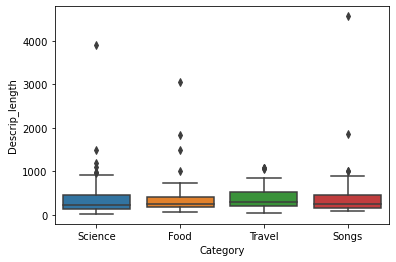

In [15]:
sns.boxplot('Category', 'Descrip_length', data=temp)

In [16]:
a1= 'J. Cole - Lewis Street is available now: https://JCole.lnk.to/LewisStreet/\nProduced by J. Cole\n\nEverything come back around full circle \nWhy do lies sound pleasant but the truth hurtful\nEverybody gotta cry once in a while '
a1= a1.split('\n')[0]
a1

'J. Cole - Lewis Street is available now: https://JCole.lnk.to/LewisStreet/'

In [17]:
temp_len= temp[temp['Descrip_length']>1500]
temp_len

,link,title,Description,Category,Descrip_length
29,3fYNON3Y_yQ,Top 17 hybrid animals created by scientists yo...,Top 17 hybrid animals created by scientists yo...,Science,3903
61,LHr1na5DZ44,101 Indian Street Food Dishes to Eat Before Yo...,🧳 101 Indian Street Food Dishes Kindle Book: h...,Food,3066
80,kvLv0Ne7-aU,japanese street food - okonomiyaki,Okonomiyaki o-konomi-yaki is a Japanese savor...,Food,1846
85,6KdQzfhBRh0,35 CRAZY FOOD IDEAS THAT WILL BLOW YOUR MIND,CRAZY COOL DISHES TO MAKE AT HOME\nCheck out a...,Food,1501
189,WPni755-Krg,Study Music Alpha Waves: Relaxing Studying Mus...,Study Music Alpha Waves: Relaxing Studying Mus...,Songs,4570
193,qFkNATtc3,"Ghungroo Song | War | Hrithik Roshan, Vaani Ka...",#YRFnewreleases - https://www.youtube.com/play...,Songs,1860


In [18]:
# temp_len.loc[:,'Description']= temp_len[temp_len['Descrip_length']>2000]['Description'].apply(lambda x: x.split('\n')[0])
# temp_len
temp_len.loc[temp_len.Descrip_length>1500, 'Description']= temp_len[temp_len['Descrip_length']>1500]['Description'].apply(lambda x: x.split('\n')[0])
temp_len

C:\Users\egoeshu\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,link,title,Description,Category,Descrip_length
29,3fYNON3Y_yQ,Top 17 hybrid animals created by scientists yo...,Top 17 hybrid animals created by scientists yo...,Science,3903
61,LHr1na5DZ44,101 Indian Street Food Dishes to Eat Before Yo...,🧳 101 Indian Street Food Dishes Kindle Book: h...,Food,3066
80,kvLv0Ne7-aU,japanese street food - okonomiyaki,Okonomiyaki o-konomi-yaki is a Japanese savor...,Food,1846
85,6KdQzfhBRh0,35 CRAZY FOOD IDEAS THAT WILL BLOW YOUR MIND,CRAZY COOL DISHES TO MAKE AT HOME,Food,1501
189,WPni755-Krg,Study Music Alpha Waves: Relaxing Studying Mus...,Study Music Alpha Waves: Relaxing Studying Mus...,Songs,4570
193,qFkNATtc3,"Ghungroo Song | War | Hrithik Roshan, Vaani Ka...",#YRFnewreleases - https://www.youtube.com/play...,Songs,1860


In [19]:
temp_len.iloc[0,2] # Now lenghth has been descreased

'Top 17 hybrid animals created by scientists you won’t believe exist in 2020!!'

In [20]:
temp.head()

,link,title,Description,Category,Descrip_length
0,U8X-fd_zQQ,12 Cool Science Tricks That Will Make Your Fri...,Impress your friends this weekend with these 1...,Science,241
1,VoLZXXQL-YY,9 Incredible Science Facts You Probably Didn't...,Common scientific facts you won't believe are ...,Science,274
2,DZcofvSqLHI,5 Amazing Experiments With Hand Sanitizer || E...,5 Simple Science Experiments With Hand Sanitiz...,Science,973
3,OY6RgrDKQ,18 EASY SCHOOL MAGIC TRICKS AND SCIENCE EXPERI...,UNEXPECTED TRICKS AND IDEAS FOR KIDS\n\nThere ...,Science,1496
4,i_2PtL7cRyE,विज्ञान के सबसे घातक प्रयोग Terrible Science E...,mYTH Tv India\n#MTI7,Science,19


In [21]:
# Reducing the high description length in main dataset which we appiled above

temp.loc[temp.Descrip_length>1500, 'Description'] =temp[temp['Descrip_length']>1500]['Description'].apply(lambda x: x.split('\n')[0])

temp.head()

,link,title,Description,Category,Descrip_length
0,U8X-fd_zQQ,12 Cool Science Tricks That Will Make Your Fri...,Impress your friends this weekend with these 1...,Science,241
1,VoLZXXQL-YY,9 Incredible Science Facts You Probably Didn't...,Common scientific facts you won't believe are ...,Science,274
2,DZcofvSqLHI,5 Amazing Experiments With Hand Sanitizer || E...,5 Simple Science Experiments With Hand Sanitiz...,Science,973
3,OY6RgrDKQ,18 EASY SCHOOL MAGIC TRICKS AND SCIENCE EXPERI...,UNEXPECTED TRICKS AND IDEAS FOR KIDS\n\nThere ...,Science,1496
4,i_2PtL7cRyE,विज्ञान के सबसे घातक प्रयोग Terrible Science E...,mYTH Tv India\n#MTI7,Science,19


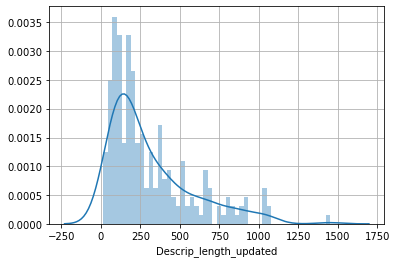

In [83]:
# Checking new length of description got after modification
temp['Descrip_length_updated']= temp['Description'].apply(len)
plt.grid(True)
sns.distplot(temp['Descrip_length_updated'], bins=50)# reduced some outliers

In [23]:
temp['Descrip_length_updated'].describe()

count     223.000000
mean      346.547085
std       271.891748
min        19.000000
25%       152.000000
50%       244.000000
75%       454.500000
max      1496.000000
Name: Descrip_length_updated, dtype: float64

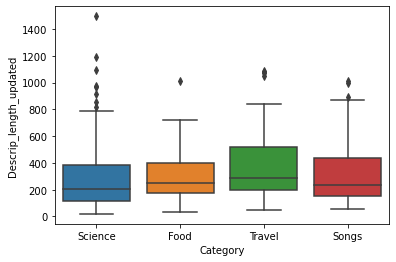

In [24]:
sns.boxplot('Category', 'Descrip_length_updated', data=temp)

#### Link Column

In [25]:
# Checking 'link' Column
temp['link'].nunique() # means all are unique so will not contribute in learning. Will delete in later stage


209

In [26]:
temp.link.describe()

count            223
unique           209
top       fE8lezHs19
freq               2
Name: link, dtype: object

In [27]:
temp.head()

,link,title,Description,Category,Descrip_length,Descrip_length_updated
0,U8X-fd_zQQ,12 Cool Science Tricks That Will Make Your Fri...,Impress your friends this weekend with these 1...,Science,241,241
1,VoLZXXQL-YY,9 Incredible Science Facts You Probably Didn't...,Common scientific facts you won't believe are ...,Science,274,274
2,DZcofvSqLHI,5 Amazing Experiments With Hand Sanitizer || E...,5 Simple Science Experiments With Hand Sanitiz...,Science,973,973
3,OY6RgrDKQ,18 EASY SCHOOL MAGIC TRICKS AND SCIENCE EXPERI...,UNEXPECTED TRICKS AND IDEAS FOR KIDS\n\nThere ...,Science,1496,1496
4,i_2PtL7cRyE,विज्ञान के सबसे घातक प्रयोग Terrible Science E...,mYTH Tv India\n#MTI7,Science,19,19


In [29]:
# Just an example below to test regex

b= 'shubhamnnn 88000222 ans11(https://www.youtube.com/channel/UC2W) 1 1!!#@'
b= re.sub(r'\d+(\.\d+)?', 'number', b)
# b= re.sub("(http://.*?\s)|(http://.*)",'',b)
b= re.sub('http://\S+|https://\S+', '', b)
b= re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'', b)
b= re.sub(r'[^\w\d\s]', '',b)
b

'shubhamnnn number ansnumber number number'

In [31]:
temp['title_length']= temp['title'].apply(len)
temp.head()

,link,title,Description,Category,Descrip_length,Descrip_length_updated,title_length
0,U8X-fd_zQQ,12 Cool Science Tricks That Will Make Your Fri...,Impress your friends this weekend with these 1...,Science,241,241,100
1,VoLZXXQL-YY,9 Incredible Science Facts You Probably Didn't...,Common scientific facts you won't believe are ...,Science,274,274,62
2,DZcofvSqLHI,5 Amazing Experiments With Hand Sanitizer || E...,5 Simple Science Experiments With Hand Sanitiz...,Science,973,973,84
3,OY6RgrDKQ,18 EASY SCHOOL MAGIC TRICKS AND SCIENCE EXPERI...,UNEXPECTED TRICKS AND IDEAS FOR KIDS\n\nThere ...,Science,1496,1496,51
4,i_2PtL7cRyE,विज्ञान के सबसे घातक प्रयोग Terrible Science E...,mYTH Tv India\n#MTI7,Science,19,19,88


In [32]:
# Cleaning 'title' column's text

temp['title']= temp['title'].map(lambda x: re.sub('\\n',' ',str(x)))# remove '\\n'
temp['title']= temp['title'].map(lambda x: re.sub('http://\S+|https://\S+', '', str(x)))# remove http links in the text
temp['title']= temp['title'].map(lambda x: re.sub(r'\d+(\.\d+)?', 'number', str(x))) # Replace digits with 'number'
temp['title']= temp['title'].map(lambda x: re.sub(r'\s+', ' ', str(x))) # Replace whitespace between terms with a single space
temp['title']= temp['title'].map(lambda x: re.sub(r'[^\w\d\s]', '',str(x))) # removing special characther like !, |
temp.head()

temp['new_title_length']= temp['title'].apply(len)
temp.head()

,link,title,Description,Category,Descrip_length,Descrip_length_updated,title_length,new_title_length
0,U8X-fd_zQQ,number Cool Science Tricks That Will Make Your...,Impress your friends this weekend with these 1...,Science,241,241,100,99
1,VoLZXXQL-YY,number Incredible Science Facts You Probably D...,Common scientific facts you won't believe are ...,Science,274,274,62,66
2,DZcofvSqLHI,number Amazing Experiments With Hand Sanitizer...,5 Simple Science Experiments With Hand Sanitiz...,Science,973,973,84,87
3,OY6RgrDKQ,number EASY SCHOOL MAGIC TRICKS AND SCIENCE EX...,UNEXPECTED TRICKS AND IDEAS FOR KIDS\n\nThere ...,Science,1496,1496,51,55
4,i_2PtL7cRyE,वजञन क सबस घतक परयग Terrible Science Experimen...,mYTH Tv India\n#MTI7,Science,19,19,88,84


In [33]:
temp.iloc[0,1] # Sample look after cleaning

'number Cool Science Tricks That Will Make Your Friends Go Omg How DIY Tricks  Life Hacks by Blossom'

In [34]:
# Dropping custom columns that were made by me
temp= temp.drop(columns=['Descrip_length_updated', 'new_title_length', 'title_length'], axis=1)
temp.head()

,link,title,Description,Category,Descrip_length
0,U8X-fd_zQQ,number Cool Science Tricks That Will Make Your...,Impress your friends this weekend with these 1...,Science,241
1,VoLZXXQL-YY,number Incredible Science Facts You Probably D...,Common scientific facts you won't believe are ...,Science,274
2,DZcofvSqLHI,number Amazing Experiments With Hand Sanitizer...,5 Simple Science Experiments With Hand Sanitiz...,Science,973
3,OY6RgrDKQ,number EASY SCHOOL MAGIC TRICKS AND SCIENCE EX...,UNEXPECTED TRICKS AND IDEAS FOR KIDS\n\nThere ...,Science,1496
4,i_2PtL7cRyE,वजञन क सबस घतक परयग Terrible Science Experimen...,mYTH Tv India\n#MTI7,Science,19


In [35]:
# Cleaning 'Description' column's text

temp['Description']= temp['Description'].map(lambda x: re.sub('\\n',' ',str(x)))# remove '\\n'
temp['Description']= temp['Description'].map(lambda x: re.sub('http://\S+|https://\S+', '', str(x)))# remove http links in the text
temp['Description']= temp['Description'].map(lambda x: re.sub(r'\d+(\.\d+)?', 'number', str(x))) # Replace digits with 'number'
temp['Description']= temp['Description'].map(lambda x: re.sub(r'\s+', ' ', str(x))) # Replace whitespace between terms with a single space
temp['Description']= temp['Description'].map(lambda x: re.sub(r'[^\w\d\s]', '',str(x))) # removing special characther like !, |
temp.head()

temp['new_Desc_length']= temp['Description'].apply(len)
temp.head()

,link,title,Description,Category,Descrip_length,new_Desc_length
0,U8X-fd_zQQ,number Cool Science Tricks That Will Make Your...,Impress your friends this weekend with these n...,Science,241,199
1,VoLZXXQL-YY,number Incredible Science Facts You Probably D...,Common scientific facts you wont believe are r...,Science,274,263
2,DZcofvSqLHI,number Amazing Experiments With Hand Sanitizer...,number Simple Science Experiments With Hand Sa...,Science,973,930
3,OY6RgrDKQ,number EASY SCHOOL MAGIC TRICKS AND SCIENCE EX...,UNEXPECTED TRICKS AND IDEAS FOR KIDS There are...,Science,1496,1450
4,i_2PtL7cRyE,वजञन क सबस घतक परयग Terrible Science Experimen...,mYTH Tv India MTInumber,Science,19,23


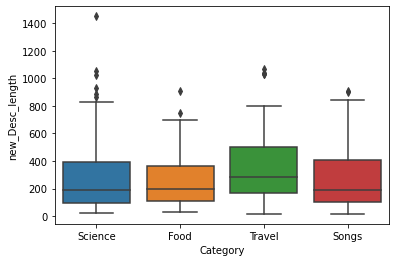

In [36]:
# Showing description length after cleaning of data

sns.boxplot(x= 'Category', y='new_Desc_length',data=temp)

In [37]:
# Removing Stopwords and doing stemming in Title column

ps= PorterStemmer()
lemm= WordNetLemmatizer()

corpus=[]
for i in range(0, len(temp['title'])):
    clean_data= temp['title'][i]
    clean_data= clean_data.lower()
    clean_data= clean_data.split()
#     clean_data = [lemm.lemmatize(word) for word in clean_data if not word in stopwords.words('english')]
    clean_data = [ps.stem(word) for word in clean_data if not word in stopwords.words('english')]
    clean_data= ' '.join(clean_data)
    corpus.append(clean_data)
    
print(len(corpus))

223


In [38]:
# Removing Stopwords and doing stemming in Description Column

corpus1=[]
for i in range(0, len(temp['Description'])):
    clean_data= temp['Description'][i]
    clean_data= clean_data.lower()
    clean_data= clean_data.split()
#     clean_data = [lemm.lemmatize(word) for word in clean_data if not word in stopwords.words('english')]
    clean_data = [ps.stem(word) for word in clean_data if not word in stopwords.words('english')]
    clean_data= ' '.join(clean_data)
    corpus1.append(clean_data)
    
print(len(corpus1))

223


In [40]:
temp= temp.drop(columns=['new_Desc_length']) # deleting 'not important' column

In [41]:
temp['title_length']= temp['title'].apply(len)
temp.head()

,link,title,Description,Category,Descrip_length,title_length
0,U8X-fd_zQQ,number Cool Science Tricks That Will Make Your...,Impress your friends this weekend with these n...,Science,241,99
1,VoLZXXQL-YY,number Incredible Science Facts You Probably D...,Common scientific facts you wont believe are r...,Science,274,66
2,DZcofvSqLHI,number Amazing Experiments With Hand Sanitizer...,number Simple Science Experiments With Hand Sa...,Science,973,87
3,OY6RgrDKQ,number EASY SCHOOL MAGIC TRICKS AND SCIENCE EX...,UNEXPECTED TRICKS AND IDEAS FOR KIDS There are...,Science,1496,55
4,i_2PtL7cRyE,वजञन क सबस घतक परयग Terrible Science Experimen...,mYTH Tv India MTInumber,Science,19,84


In [42]:
# Now checking how many words have been removed after cleaning data

temp['new_title']= corpus
temp['new_description']= corpus1
temp['newtitle_length']= temp['new_title'].apply(len)
temp['newDesc_length']= temp['new_description'].apply(len)
temp.head()

,link,title,Description,Category,Descrip_length,title_length,new_title,new_description,newtitle_length,newDesc_length
0,U8X-fd_zQQ,number Cool Science Tricks That Will Make Your...,Impress your friends this weekend with these n...,Science,241,99,number cool scienc trick make friend go omg di...,impress friend weekend number cool scienc tric...,71,124
1,VoLZXXQL-YY,number Incredible Science Facts You Probably D...,Common scientific facts you wont believe are r...,Science,274,66,number incred scienc fact probabl didnt learn ...,common scientif fact wont believ real well per...,52,169
2,DZcofvSqLHI,number Amazing Experiments With Hand Sanitizer...,number Simple Science Experiments With Hand Sa...,Science,973,87,number amaz experi hand sanit easi scienc expe...,number simpl scienc experi hand sanit hello gu...,54,622
3,OY6RgrDKQ,number EASY SCHOOL MAGIC TRICKS AND SCIENCE EX...,UNEXPECTED TRICKS AND IDEAS FOR KIDS There are...,Science,1496,55,number easi school magic trick scienc experi,unexpect trick idea kid mani scienc trick perf...,44,864
4,i_2PtL7cRyE,वजञन क सबस घतक परयग Terrible Science Experimen...,mYTH Tv India MTInumber,Science,19,84,वजञन क सबस घतक परयग terribl scienc experi ever...,myth tv india mtinumb,72,21


In [43]:
# Printing word tokens of 'title' column

from nltk.tokenize import word_tokenize

all_words=[]
word_tokens=[]
for i in range(0, len(temp['new_title'])):
    word_tokens= word_tokenize(temp['new_title'][i])
    for w in word_tokens:
        all_words.append(w)

print(f'words in title are: {all_words}')
print(f'total words in title are: {len(all_words)}')

words in title are: ['number', 'cool', 'scienc', 'trick', 'make', 'friend', 'go', 'omg', 'diy', 'trick', 'life', 'hack', 'blossom', 'number', 'incred', 'scienc', 'fact', 'probabl', 'didnt', 'learn', 'school', 'number', 'amaz', 'experi', 'hand', 'sanit', 'easi', 'scienc', 'experi', 'sanit', 'number', 'easi', 'school', 'magic', 'trick', 'scienc', 'experi', 'वजञन', 'क', 'सबस', 'घतक', 'परयग', 'terribl', 'scienc', 'experi', 'ever', 'conduct', 'part', 'number', 'hindi', 'top', 'number', 'question', 'scienc', 'cant', 'answer', '_', 'hindi', 'number', 'amaz', 'scienc', 'experi', 'hindi', 'amaz', 'scienc', 'toysgadget', 'number', 'easi', 'scienc', 'experi', 'kid', 'number', 'amaz', 'scienc', 'experi', 'optic', 'illus', 'compil', 'scienc', 'cant', 'explain', 'caught', 'sky', 'easi', 'scienc', 'experi', 'tri', 'home', 'number', 'mysteri', 'event', 'make', 'question', 'realiti', 'boaz', 'almog', 'levit', 'superconductor', 'number', 'easi', 'scienc', 'experi', 'home', 'free', 'energi', 'gener', 'de

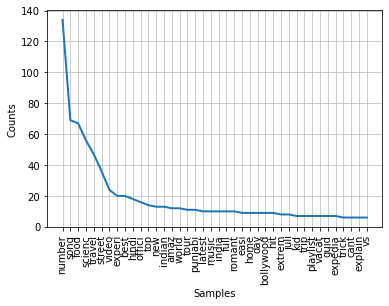

In [44]:
cts= nltk.FreqDist(all_words)
cts.plot(40) # top common 40 words are showing below in 'title' column

In [45]:
# Printing word tokens ofr 'Description' column

all_words=[]
word_tokens=[]
for i in range(0, len(temp['new_description'])):
    word_tokens= word_tokenize(temp['new_description'][i])
    for w in word_tokens:
        all_words.append(w)

# print(f'words in title are: {all_words}')
print(f'total words in Description are: {len(all_words)}')

total words in Description are: 7521


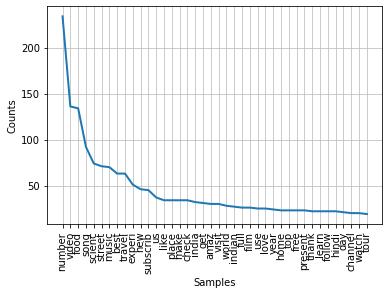

In [46]:
cts= nltk.FreqDist(all_words)
cts.plot(40) # top common 40 words are showing below in 'description' column

In [52]:
# Now Joining both title and description to make one text

for row in range(0, len(temp.index)):
    temp.loc[row,'paragraph']= [' '.join(str(line) for line in temp.iloc[row,6:8])] #merging all line into one


temp.head()

,link,title,Description,Category,Descrip_length,title_length,new_title,new_description,newtitle_length,newDesc_length,paragraph
0,U8X-fd_zQQ,number Cool Science Tricks That Will Make Your...,Impress your friends this weekend with these n...,Science,241,99,number cool scienc trick make friend go omg di...,impress friend weekend number cool scienc tric...,71,124,number cool scienc trick make friend go omg di...
1,VoLZXXQL-YY,number Incredible Science Facts You Probably D...,Common scientific facts you wont believe are r...,Science,274,66,number incred scienc fact probabl didnt learn ...,common scientif fact wont believ real well per...,52,169,number incred scienc fact probabl didnt learn ...
2,DZcofvSqLHI,number Amazing Experiments With Hand Sanitizer...,number Simple Science Experiments With Hand Sa...,Science,973,87,number amaz experi hand sanit easi scienc expe...,number simpl scienc experi hand sanit hello gu...,54,622,number amaz experi hand sanit easi scienc expe...
3,OY6RgrDKQ,number EASY SCHOOL MAGIC TRICKS AND SCIENCE EX...,UNEXPECTED TRICKS AND IDEAS FOR KIDS There are...,Science,1496,55,number easi school magic trick scienc experi,unexpect trick idea kid mani scienc trick perf...,44,864,number easi school magic trick scienc experi u...
4,i_2PtL7cRyE,वजञन क सबस घतक परयग Terrible Science Experimen...,mYTH Tv India MTInumber,Science,19,84,वजञन क सबस घतक परयग terribl scienc experi ever...,myth tv india mtinumb,72,21,वजञन क सबस घतक परयग terribl scienc experi ever...


In [53]:
#CHecking one reference whether we did it correct

print(temp.new_title[165])
print(temp.new_description[165], sep='\n')
print(temp.paragraph[165])

hindi heart touch song number bollywood hit song number juli new hindi romant song number
hindi heart touch song number bollywood hit song number juli new hindi romant song number hello thank check much love music also love make movi part adventur channel see varieti video made music collect cover song music video wed film short film documentari film even corpor video visit social media link comment suggest need someon talk subscrib fanpag
hindi heart touch song number bollywood hit song number juli new hindi romant song number hindi heart touch song number bollywood hit song number juli new hindi romant song number hello thank check much love music also love make movi part adventur channel see varieti video made music collect cover song music video wed film short film documentari film even corpor video visit social media link comment suggest need someon talk subscrib fanpag


### Dataset splitting in train and test

In [54]:
X= temp['paragraph']
Y= temp['Category']

In [55]:
# Splitting dataset fro traing and test
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(156,)
(67,)
(156,)
(67,)


In [56]:
# Encoding Target variable

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(y_train)
y_train= le.transform(y_train) # transforming train variable

y_test= le.transform(y_test) # transforming test variable

print(y_test)

[0 2 2 3 2 3 1 2 0 1 3 1 1 3 0 2 3 2 2 0 3 0 3 0 3 1 3 3 3 3 1 3 3 2 1 1 0
 1 0 2 0 3 3 3 2 1 3 2 2 3 3 2 2 1 3 3 2 1 2 1 0 1 0 2 0 1 0]


### Converting words to vector

In [57]:
# Now, Using Countvectorizer to convert all words into vector
from sklearn.feature_extraction.text import CountVectorizer


cv= CountVectorizer()
cv=  cv.fit(X_train)
train_data= cv.transform(X_train)  # same is above, only dataframe is using here

test_data= cv.transform(X_test) # Using a pipeline, you would fuse the TFIDFVectorizer with your model into a single object that does the transformation and prediction in a single step. It's easier to maintain a solid methodology within that pattern.

print(train_data.shape)
print(test_data.shape) 

(156, 2068)
(67, 2068)


In [58]:
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [59]:
train_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
cv_df= pd.DataFrame(train_data.todense(),columns=cv.get_feature_names())
cv_df

,_____________________________________________,______________________________________________,abhishek,abl,abraham,abram,absolut,abyss,access,accord,...,मगर,मर,रह,वजञन,सइस,हम,हमर,ਔਜਰ,สดยอดอาหารใต,เยาวราช
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# We have to give less weightage to common words and more importance to less common word

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

tfidf= TfidfVectorizer(ngram_range=(1, 1)) # ngram_range=(1, 1) works best in this case
tfidf=  tfidf.fit(X_train)
tfidf_train_data= tfidf.transform(X_train)  # same is above, only dataframe is using here

tfidf_test_data= tfidf.transform(X_test) # Using a pipeline, you would fuse the TFIDFVectorizer with your model into a single object that does the transformation and prediction in a single step. It's easier to maintain a solid methodology within that pattern.

print(tfidf_train_data.shape)
print(tfidf_test_data.shape) 

(156, 2068)
(67, 2068)


In [108]:
# Saving tfidf object in a file

pickle.dump(tfidf, open("tfidf.pickle", "wb")) # writing object in file


tfidf_loaded_model = pickle.load(open(filename, 'rb'))

# pickle.dump(tfidf_train_data, open("train_data.pickle", "wb"))
# pickle.dump(tfidf_test_data, open("test_data.pickle", "wb"))

#### Random Forest

In [105]:
# First we are making model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

random_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0)

random_classifier.fit(tfidf_train_data, y_train)
y_pred = random_classifier.predict(tfidf_test_data)
print(f'accuracy from Random classifier is {accuracy_score(y_test, y_pred)}')

accuracy from Random classifier is 0.9253731343283582


In [81]:
print(confusion_matrix(y_test, pred))

[[12  0  1  0]
 [ 0 15  0  0]
 [ 1  0 16  0]
 [ 3  0  1 18]]


In [356]:
#-- By hyper parameter algorithm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rm= RandomForestClassifier()

# # By Grid search CV , here no use of hyper tuning bcuz giving default details only
param_grids= {'n_estimators': [i for i in range(100,500,100)], 'max_depth': [5,10, None], 'max_features': ['auto', 'sqrt', 'log2']} #taking time to execute
grid= GridSearchCV(rm, param_grids)
grid.fit(tfidf_train_data, y_train)
print(grid.best_params_) #will give all best parameter--> here, {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100} which is by default only
print(grid.best_estimator_) # will give all parameters present in randomclassifier
grid_predictions= grid.predict(tfidf_test_data)
print(accuracy_score(y_test, grid_predictions)) # getting .88 core by grid search CV
# # print('\n')

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8


In [63]:
# From Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB #now trainging data
nb=MultinomialNB()

nb.fit(tfidf_train_data,y_train) #fiitng data

predictions= nb.predict(tfidf_test_data)#now making prediction
print(f'accuracy from Naive classifier is {accuracy_score(y_test, predictions)}')

accuracy from Naive classifier is 0.9253731343283582


#### XGBoost

In [84]:
from xgboost import XGBClassifier
xgb= XGBClassifier()

xgb.fit(tfidf_train_data, y_train)
pred= xgb.predict(tfidf_test_data)

train_pred= xgb.predict(tfidf_train_data)
print(f'accuracy for training data from XGB classifier is {accuracy_score(y_test, pred)}')
print(f'accuracy for test data from XGB classifier is {accuracy_score(y_train, train_pred)}')


accuracy for training data from XGB classifier is 0.9104477611940298
accuracy for test data from XGB classifier is 0.967948717948718


In [65]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       1.00      1.00      1.00        15
           2       0.89      0.94      0.91        17
           3       1.00      0.82      0.90        22

    accuracy                           0.91        67
   macro avg       0.91      0.92      0.91        67
weighted avg       0.92      0.91      0.91        67



In [66]:
print(confusion_matrix(y_test, pred))

[[12  0  1  0]
 [ 0 15  0  0]
 [ 1  0 16  0]
 [ 3  0  1 18]]


In [67]:
params= {
    'learning_rate': [0.05,0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,7,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

xgb_classify= XGBClassifier()

random_search= RandomizedSearchCV(xgb_classify, param_distributions=params, n_iter=5,n_jobs= -1, cv=5, verbose=3)

random_search.fit(tfidf_train_data, y_train)

random_pred= random_search.predict(tfidf_test_data)

print(random_search.best_estimator_)
print(random_search.best_params_)
print(accuracy_score(random_pred, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.0s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.25, 'gamma': 0.0, 'colsample_bytree': 0.4}
0.9253731343283582


In [75]:
# Getting good accuracy now 90% from 88% after Randomised CV

xgb_object= XGBClassifier(min_child_weight= 1, max_depth= 10, learning_rate= 0.25, gamma= 0.0, colsample_bytree= 0.4)
xgb_object.fit(tfidf_train_data, y_train)

prediction= xgb_object.predict(tfidf_test_data)

print(f'accuracy from XGB classifier is {accuracy_score(y_test, prediction)*100}')

accuracy from XGB classifier is 92.53731343283582


In [111]:
# Saving XGboost object in file for prediction in deployment

import pickle

filename = 'xgboost_model.pickle'

pickle.dump(xgb_object, open(filename, 'wb'))

xgb_loaded_model = pickle.load(open(filename, 'rb')) # uploading model 

In [76]:
# Precision and Recall values are fine

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       1.00      1.00      1.00        15
           2       0.94      0.94      0.94        17
           3       0.95      0.86      0.90        22

    accuracy                           0.93        67
   macro avg       0.92      0.93      0.93        67
weighted avg       0.93      0.93      0.93        67



In [85]:
prediction

array([0, 2, 2, 3, 2, 2, 1, 2, 0, 1, 3, 1, 1, 3, 0, 2, 0, 0, 2, 0, 3, 2,
       3, 0, 3, 1, 3, 3, 3, 3, 1, 3, 0, 2, 1, 1, 0, 1, 0, 2, 0, 3, 0, 3,
       2, 1, 3, 2, 2, 0, 3, 2, 2, 1, 3, 3, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1,
       0])

In [107]:
pred_prob= xgb_object.predict_proba(tfidf_test_data)
pred_prob[:3]

array([[0.58462316, 0.04044724, 0.09383547, 0.28109413],
       [0.00495837, 0.01061431, 0.9762107 , 0.00821663],
       [0.00488354, 0.00601201, 0.97619677, 0.0129077 ]], dtype=float32)

#### Adaboost

In [79]:
from sklearn.ensemble import AdaBoostClassifier

ada_classify= AdaBoostClassifier(n_estimators=300, learning_rate=.1)
ada_classify.fit(tfidf_train_data, y_train)

prediction= ada_classify.predict(tfidf_test_data)
print(f'accuracy from Adaboost classifier is {accuracy_score(y_test, prediction)*100}') # seems not getting good accuracy

accuracy from Adaboost classifier is 62.68656716417911


#### Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_classify= GradientBoostingClassifier(learning_rate=.1, n_estimators=500)

gradient_classify.fit(tfidf_train_data, y_train)

prediction= gradient_classify.predict(tfidf_test_data)
print(f'accuracy from Adaboost classifier is {accuracy_score(y_test, prediction)*100}')

accuracy from Adaboost classifier is 89.55223880597015


## testing on real world data

In [123]:
# a_title= 'How Expensive is it to Travel Japan? | Budget Travel Tips'
# a_descrip= 'Travelling Japan is cheaper and easier than ever before thanks to a recent boom in tourism.\
# ► SUBSCRIBE for more Japan tips! https://goo.gl/Kq44VX\
# ► GET inspiration for your trip: http://seejapan.co.uk\
# ► DISCOVER daily ideas for your trip: http://facebook.com/visitjapanuk\
# ► VISIT your Japan tourism site: https://www.jnto.go.jp/\
# Caption author (Ukrainian)\
# Roman Hulovatyi\
# Caption authors (Portuguese (Brazil))\
# Marina Emi\
# Samuel Johnson\
# Caption author (German)\
# Denis Beck\
# Caption author (Spanis)'

a_title='Dil Bechara- Khulke Jeene Ka (Official)|Sushant, Sanjana|A.R Rahman|Arijit, Shashaa|Amitabh B|Mukesh'
a_descrip= 'Shot in the love capital of the world, Khulke Jeene Ka is about living life to the fullest!\
Arijit Singh and Shashaa Tirupati instill beautiful emotions into this melody '



a_title= re.sub('\\n',' ',str(a_title))# remove '\\n'
a_title= re.sub('http://\S+|https://\S+', '', str(a_title))# remove http links in the text
a_title= re.sub(r'\d+(\.\d+)?', 'number', str(a_title)) # Replace digits with 'number'
a_title= re.sub(r'\s+', ' ', str(a_title)) # Replace whitespace between terms with a single space
a_title= re.sub(r'[^\w\d\s]', '',str(a_title)) # removing special characther like !, |

# print(a_title)

a_descrip= re.sub('\\n',' ',str(a_descrip))# remove '\\n'
a_descrip= re.sub('http://\S+|https://\S+', '', str(a_descrip))# remove http links in the text
a_descrip= re.sub(r'\d+(\.\d+)?', 'number', str(a_descrip)) # Replace digits with 'number'
a_descrip= re.sub(r'\s+', ' ', str(a_descrip)) # Replace whitespace between terms with a single space
a_descrip= re.sub(r'[^\w\d\s]', '',str(a_descrip)) # removing special characther like !, |

# print(a_descrip)

ps= PorterStemmer()

corpus = []

clean_data = a_title
clean_data = clean_data.lower()
clean_data = clean_data.split()
clean_data = [ps.stem(word) for word in clean_data if not word in stopwords.words('english')]
clean_data = ' '.join(clean_data)
corpus.append(clean_data)
# print((corpus))

corpus1 = []
clean_data = a_descrip
clean_data = clean_data.lower()
clean_data = clean_data.split()
clean_data = [ps.stem(word) for word in clean_data if not word in stopwords.words('english')]
clean_data = ' '.join(clean_data)
corpus1.append(clean_data)
# print((corpus1))


merge_text= corpus+ corpus1

merge_text= ' '.join(merge_text)
# print(merge_text)

tfidf_loaded_model = pickle.load(open('tfidf.pickle', 'rb'))

test_data= tfidf_loaded_model.transform([merge_text])

xgb_loaded_model = pickle.load(open('xgboost_model.pickle', 'rb'))

pred= xgb_loaded_model.predict(test_data)

# print(pred)

predictions_test = le.inverse_transform(pred) # reversing to orginal data

predictions_test[0]  # Predicted correct

'Songs'